<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Six Dutch stations
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [25]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy.signal as signal
import datetime as dt

In [26]:
# Settings
plt.rcParams['axes.grid'] = True

#### Connect database and import data

In [27]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [28]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""tijd"" TIMESTAMP,\n..."
1,table,timeseries,timeseries,3,"CREATE TABLE ""timeseries"" (\n""index"" INTEGER,\..."
2,table,const_mnth,const_mnth,4,"CREATE TABLE ""const_mnth"" (\n""tijd"" TIMESTAMP,..."
3,index,ix_const_yr_tijd_naam_level_2,const_yr,5,"CREATE INDEX ""ix_const_yr_tijd_naam_level_2""ON..."
4,index,ix_timeseries_index,timeseries,6,"CREATE INDEX ""ix_timeseries_index""ON ""timeseri..."
5,index,ix_const_mnth_tijd_naam_level_2,const_mnth,7,"CREATE INDEX ""ix_const_mnth_tijd_naam_level_2""..."


In [29]:
sql = "PRAGMA table_info(timeseries)"
pd.read_sql(sql, cnxn)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,naam,TEXT,0,None,0
2,2,tijd,TIMESTAMP,0,None,0
3,3,waarde,REAL,0,None,0
4,4,bron,TEXT,0,None,0
5,5,h_astr,REAL,0,None,0
6,6,setup,REAL,0,None,0


In [30]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT naam, tijd, waarde AS h, h_astr, setup "
    "FROM timeseries "
    "WHERE naam IN ('Hoek van Holland') "
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [31]:
df.set_index(keys = 'tijd', inplace = True)
df = df.loc[df['tijd'].dt.month == 7]
df = df.reset_index()

In [32]:
df

,naam,tijd,h,h_astr,setup
206,Hoek van Holland,1887-07-08 01:00:00,-1.04,-0.337919,-0.702081
207,Hoek van Holland,1887-07-08 05:10:00,0.80,0.986524,-0.186524
208,Hoek van Holland,1887-07-08 10:10:00,-0.60,-0.829943,0.229943
209,Hoek van Holland,1887-07-08 10:40:00,-0.54,-0.897428,0.357428
210,Hoek van Holland,1887-07-08 12:30:00,-0.74,-0.637490,-0.102510
...,...,...,...,...,...
653985,Hoek van Holland,2021-07-31 19:00:00,1.28,0.733034,0.546966
653986,Hoek van Holland,2021-07-31 20:00:00,1.09,0.704835,0.385165
653987,Hoek van Holland,2021-07-31 21:00:00,0.73,0.516237,0.213763
653988,Hoek van Holland,2021-07-31 22:00:00,0.25,0.209791,0.040209


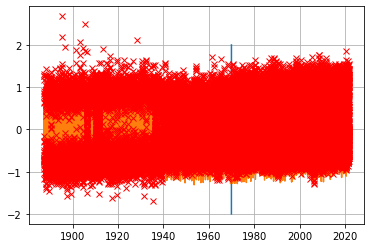

In [37]:
x = np.linspace(-2,2,100)
plt.plot(x,x)
#plt.plot(df['h'] , df['h_astr'], 'rx');
plt.plot(df['tijd'] , df['h_astr'])
plt.plot(df['tijd'] , df['h'], 'rx');